<a href="https://colab.research.google.com/github/sgrubas/NES/blob/main/notebooks/NES-TP_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Example of NES-TP usage 
---
---
Open in [Colab](https://colab.research.google.com/github/sgrubas/NES/blob/main/notebooks/NES-TP_Tutorial.ipynb)

See [github](https://github.com/sgrubas/NES) and [paper](https://arxiv.org/abs/2205.07989)

# Architecture

![NES-TP.png](attachment:NES-TP.png)

# Content
0. [Imports](#imports)
1. [How to use NES-TP?](#howto)
2. [Example in a simple model](#simple)
3. [Example in Marmousi model](#marmousi)
4. [Example in 3D Marmousi model](#3dmodel)

<a id='imports'></a>
# Imports

In [1]:
!pip install git+https://github.com/sgrubas/NES.git # Neural Eikonal Solver
!pip install eikonalfm # for reference solution (2nd-order factored FMM)

from IPython.display import clear_output
clear_output()

In [2]:
import numpy as np
from tqdm.notebook import tqdm
from tqdm.keras import TqdmCallback
import holoviews as hv
hv.extension('matplotlib')

import tensorflow as tf
import NES
from eikonalfm import factored_fast_marching as ffm
from eikonalfm import distance

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

---
<a id='howto'></a>
# How to use NES-TP?
---

This is a short guideline, for a detailed description of each function and method please see the docstrings.
1. Create velocity model and define the domain. Velocity model should be class of `NES.Interpolator`.
2. Instantiate solver `Eik = NES.NES_TP(velocity)`.
3. Build neural-network model `Eik.build_model(...)`.
4. Train `Eik.train(x_train=10000, tolerance=1e-3, epochs=150, ...)`
5. Predict traveltimes `Eik.Traveltime(X_test)`
6. Save `Eik.save(...)`
7. Load `NES.NES_TP.load(...)`

NES-TP can compute the following features:

*   `NES.NES_TP.Traveltime` - traveltimes for a given source-receiver pairs
*   `NES.NES_TP.GradientR` - gradient of traveltimes w.r.t. receiver coordinates
*   `NES.NES_TP.GradientS` - gradient of traveltimes w.r.t. source coordinates
*   `NES.NES_TP.VelocityR` - predicted velocity model on receiver coordinates
*   `NES.NES_TP.VelocityS` - predicted velocity model on source coordinates
*   `NES.NES_TP.LaplacianR` - laplacian of traveltimes w.r.t. receiver coordinates
*   `NES.NES_TP.LaplacianS` - laplacian of traveltimes w.r.t. source coordinates
*   `NES.NES_TP.HessianR` - full hessian of traveltimes w.r.t. receiver coordinates
*   `NES.NES_TP.HessianS` - full hessian of traveltimes w.r.t. source coordinates
*   `NES.NES_TP.HessianSR` - mixed hessian of traveltimes w.r.t. source and receiver coordinates
*   `NES.NES_TP.Multisource` - combined traveltimes from multiple sources
*   `NES.NES_TP.Reflection` - traveltimes of reflected wave from a given boundary
*   `NES.NES_TP.Raylets` - stationary points between a source-receiver pair (for ray multipathing analysis)



---
<a id='simple'></a>
# Example in a simple model
---

## Velocity model

In [3]:
nx, nz = 101, 101
xmin, xmax = -1.5, 1.5
zmin, zmax = -2.0, 1.0
x = np.linspace(xmin, xmax, nx)
z = np.linspace(zmin, zmax, nz)

Xr = np.stack(np.meshgrid(x, z, indexing='ij'), axis=-1)

# Manually creat velocity model
vmin = 2.0; vmax = 1.0
mus = np.array([0.05, -0.45])
sigmas = np.array([0.3, 0.3])
V = (vmax - vmin) * np.exp(- ((Xr - mus)**2 / 2 / sigmas**2).sum(axis=-1)) + vmin

# 'Interpolator' object will define velocity model and the domain
Vel = NES.Interpolator(V, x, z)

## Reference solution

In [4]:
# Source points
s_sp = 5
Xs = np.stack(np.meshgrid(x[::s_sp], z[::s_sp], indexing='ij'), axis=-1)

X = np.stack(np.meshgrid(x[::s_sp], z[::s_sp], x, z, indexing='ij'), axis=-1)

In [5]:
# Traveltime using Factored fast marching of second order

T_ref = np.empty(Xs.shape[:-1] + Xr.shape[:-1])
dxs = [x[1]-x[0], z[1]-z[0]]
for i, ixs in enumerate(tqdm(range(0, nx, s_sp))):
    for j, jzs in enumerate(range(0, nz, s_sp)):
        T_ref[i,j] = ffm(V, (ixs,jzs), dxs, 2)
        T_ref[i,j] *= distance(V.shape, dxs, (ixs,jzs), indexing='ij')

  0%|          | 0/21 [00:00<?, ?it/s]

## NES-TP initializaiton and training

In [6]:
# Eikonal equation - optional
eikonal = NES.IsoEikonal(p=2, # power of right and left hand sides of equation 
                         hamiltonian=True # whether to use Hamiltonian form
                         )

# Initialization
Eik = NES.NES_TP(velocity=Vel, # velocity model (see NES.Interpolator)
                 eikonal=eikonal # optional, by default isotropic eikonal equation
                 )

# Build neural-network model
tf.keras.backend.clear_session()
Eik.build_model(nl=4, # number of layers
                nu=70, # number of units (may be a list)
                act='ad-gauss-1', # acivation funciton ('ad' means adaptive, '1' means slope scale)
                out_act='ad-sigmoid-1', # output activation, 'sigmoid' stands for improved factorization
                input_scale=True, # inputs scaling
                factored=True, # factorization
                out_vscale=True, # constraining by the slowest and the fastest solutions
                reciprocity=True, # symmetrizaion for the reciprocity principle 
                )

# Compilation for training - optional
Eik.compile(optimizer=None, # optimizer can be set manually
            loss='mae', # loss function
            lr=0.003, # learning rate for Adam optimizer
            decay=0.0005) # decay rate for Adam optimizer

In [7]:
%%time
num_pts = 20000
h = Eik.train(x_train=num_pts, # number of random colocation points for training
              tolerance=2e-3, # tolerance value for early stopping (expected error with 2nd-order f-FMM)
              epochs=2000,
              verbose=0,
              callbacks=[TqdmCallback(verbose=0, miniters=10, mininterval=5)], # progress bar
              batch_size=int(num_pts/4),
              )

0epoch [00:00, ?epoch/s]

Epoch 00667: early stopping
loss: 0.00274
Approximate RMAE of solution: 0.18990 %
CPU times: user 27.7 s, sys: 1.06 s, total: 28.7 s
Wall time: 33.2 s


## Save and load

In [8]:
filepath = 'NES-TP_Model_Simple'
Eik.save(filepath, # path and filename which defines the folder with saved model
         save_optimizer=False, # optimizer state can be saved to continue training
         training_data=False) # training data can be saved
Eik = NES.NES_TP.load(filepath)

Loaded model from "NES-TP_Model_Simple"


## Traveltime and gradient fields

In [9]:
T = Eik.Traveltime(X)
G = Eik.GradientR(X)

# MAE of traveltimes
print('MAE', abs(T - T_ref).mean())
print('RMAE', abs(T - T_ref).mean() / T_ref.mean() * 100, '%')

MAE 0.0008350704111623797
RMAE 0.09825090091209805 %


In [12]:
figs = []

for ixs in [(1,1), (10,20)]:
    vmap = hv.Image((x, z, V.T), kdims=['X (km)', 'Z (km)'], 
                  vdims='Velocity, km/s', 
                  label='V').opts(cmap='viridis', colorbar=True)

    colors = ['black', 'white']
    tmapref = hv.Image((x, z, T_ref[ixs].T), label='T_ref')
    tmap = hv.Image((x, z, T[ixs].T), label='T_NES')

    levels = np.linspace(T.min(), T.max(), 15)

    tctrref = hv.operation.contours(tmapref, levels=levels).opts(color=colors[0], cmap=[colors[0]], 
                                                                 linestyle='solid', linewidth=4)
    tctr = hv.operation.contours(tmap, levels=levels).opts(color=colors[1], cmap=[colors[1]], 
                                                           linestyle='dashed', linewidth=2)

    srcp = hv.Scatter([Xs[ixs]]).opts(marker='*', s=200, c='r')

    sp = 7
    G_ = G[ixs][::sp, ::sp]
    mag = np.linalg.norm(G_, axis=-1)
    angle = -np.arctan2(G_[..., 1]/mag, G_[..., 0]/mag)
    vf = hv.VectorField((x[::sp], z[::sp], angle.T, mag.T)).opts(magnitude='Magnitude')

    fig1 = (vmap * tctrref * tctr * srcp).opts(hv.opts.Image(show_legend=False, fig_size=170, 
                                                invert_yaxis=True,
                                      fontsize=dict(labels=15, ticks=15, legend=15, title=18)))
    fig2 = (vmap * srcp * vf).opts(hv.opts.Image(show_legend=False, fig_size=170, 
                                                invert_yaxis=True,
                                      fontsize=dict(labels=15, ticks=15, legend=15, title=18)))
    figs.append((fig1.opts(title='Solution contours') + fig2.opts(title='Gradient field')).opts(fig_size=200))

fig = hv.Layout(figs).cols(2)

:Layout
   .Overlay.I   :Overlay
      .Image.V        :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Contours.T_ref :Contours   [x,y]   (z)
      .Contours.T_NES :Contours   [x,y]   (z)
      .Scatter.I      :Scatter   [x]   (y)
   .Overlay.II  :Overlay
      .Image.V       :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Scatter.I     :Scatter   [x]   (y)
      .VectorField.I :VectorField   [x,y]   (Angle,Magnitude)
   .Overlay.III :Overlay
      .Image.V        :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Contours.T_ref :Contours   [x,y]   (z)
      .Contours.T_NES :Contours   [x,y]   (z)
      .Scatter.I      :Scatter   [x]   (y)
   .Overlay.IV  :Overlay
      .Image.V       :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Scatter.I     :Scatter   [x]   (y)
      .VectorField.I :VectorField   [x,y]   (Angle,Magnitude)
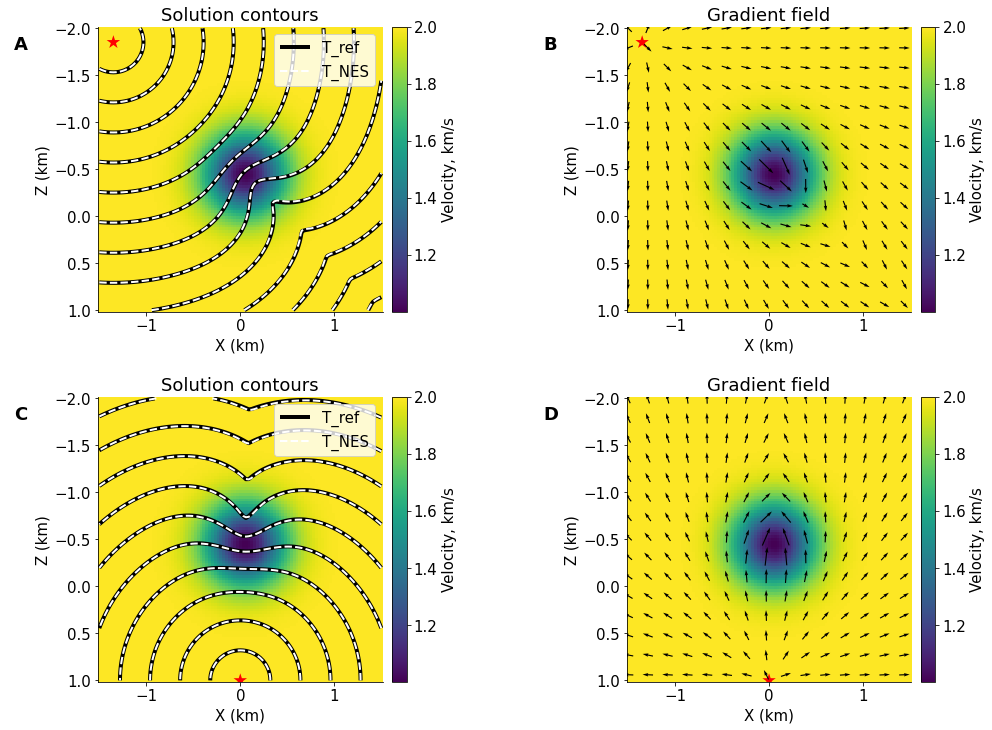

In [13]:
fig.opts(fig_size=170)

## Multisource

In [15]:
xms = np.logspace(-1.5, 0.0, 250)
xms = np.stack((xms, np.exp(-10*xms)-1.0), axis=-1)

Tm = Eik.Multisource(xms, Xr, verbose=1)

26/26 [==============================] - 0s 15ms/step


:Overlay
   .Image.V             :Image   [X (km),Z (km)]   (Velocity, km/s)
   .Contours.Traveltime :Contours   [x,y]   (z)
   .Curve.Source_line   :Curve   [x]   (y)
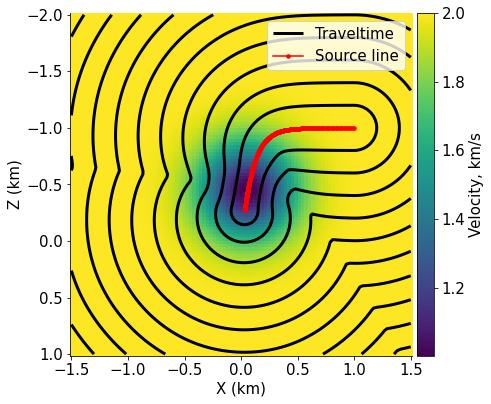

In [17]:
vmap = hv.Image((x, z, V.T), kdims=['X (km)', 'Z (km)'], 
                vdims='Velocity, km/s', 
                label='V').opts(cmap='viridis', colorbar=True)

tmap = hv.Image((x, z, Tm.T), label='Traveltime')

tctr = hv.operation.contours(tmap, levels=10).opts(color='black', cmap=['black'], linestyle='solid', linewidth=3, show_legend=True)

srcp = hv.Curve(xms, label='Source line').opts(color='r', linewidth=1.5, ms=7, marker='.', show_legend=True)

fig = (vmap * tctr * srcp).opts(hv.opts.Image(show_legend=False, fig_size=170, 
                                              invert_yaxis=True,
                                      fontsize=dict(labels=15, ticks=15, legend=15, title=18)))
fig

## Reflection

In [18]:
xs0 = [-1.4, -1.8]
xds = np.linspace(xmin, xmax, 250)
xds = np.stack((xds, 0.4-xds/3), axis=-1)

T0, Tr = Eik.Reflection(xs0, xds, Xr, batch_size=250000, verbose=1)

11/11 [==============================] - 0s 39ms/step


:Overlay
   .Image.V                         :Image   [X (km),Z (km)]   (Velocity, km/s)
   .Contours.Forward_traveltimes    :Contours   [x,y]   (z)
   .Contours.Reflection_traveltimes :Contours   [x,y]   (z)
   .Curve.Reflection_horizon        :Curve   [x]   (y)
   .Scatter.Source                  :Scatter   [x]   (y)
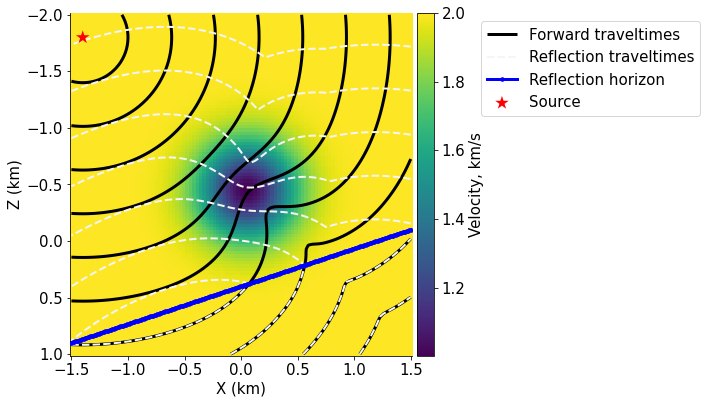

In [19]:
vmap = hv.Image((x, z, V.T), kdims=['X (km)', 'Z (km)'], 
                vdims='Velocity, km/s', 
                label='V').opts(cmap='viridis', colorbar=True)

colors = ['black', 'whitesmoke']
tmap0 = hv.Image((x, z, T0.T), label='Forward traveltimes')
tmapr = hv.Image((x, z, Tr.T), label='Reflection traveltimes')

levels = np.linspace(T0.min(), T0.max(), 12)
levels2 = np.arange(T0.max(), Tr.max(), levels[1]-levels[0])
levelsr = np.hstack((levels, levels2[1:]))
tctr0 = hv.operation.contours(tmap0, levels=levels).opts(color=colors[0], cmap=[colors[0]], linestyle='solid', linewidth=3)
tctrr = hv.operation.contours(tmapr, levels=levelsr).opts(color=colors[1], cmap=[colors[1]], linestyle='dashed', linewidth=2)

srcp = hv.Scatter([xs0], label='Source').opts(marker='*', s=200, c='r')
horizon = hv.Curve(xds, label='Reflection horizon').opts(color='blue', linewidth=3, 
                                                         marker='.', ms=7)

fig = (vmap * tctr0 * tctrr * horizon * srcp).opts(hv.opts.Image(show_legend=False, fig_size=170, 
                                                invert_yaxis=True,
                                      fontsize=dict(labels=15, ticks=15, legend=15, title=18)))
fig.opts(legend_opts=dict(loc=(1.2, 0.7)))

## Stationary points

In [20]:
%%time
xs1 = [-0.95, -1.5]; xs2 = [0.95, 0.5]
Sc, Tc = Eik.Raylets(xs1=xs1, # source #1 (source)
                     xs2=xs2, # source #2 (receiver)
                     Xc=Xr, # grid for stationary field
                     traveltimes=True, # whether to calculate combined traveltimes
                     verbose=0)

CPU times: user 857 ms, sys: 22.1 ms, total: 879 ms
Wall time: 901 ms


:Layout
   .Overlay.I  :Overlay
      .Image.I   :Image   [x,y]   (z)
      .Scatter.I :Scatter   [x]   (y)
   .Overlay.II :Overlay
      .Image.I    :Image   [x,y]   (z)
      .Contours.I :Contours   [x,y]   (z)
      .Scatter.I  :Scatter   [x]   (y)
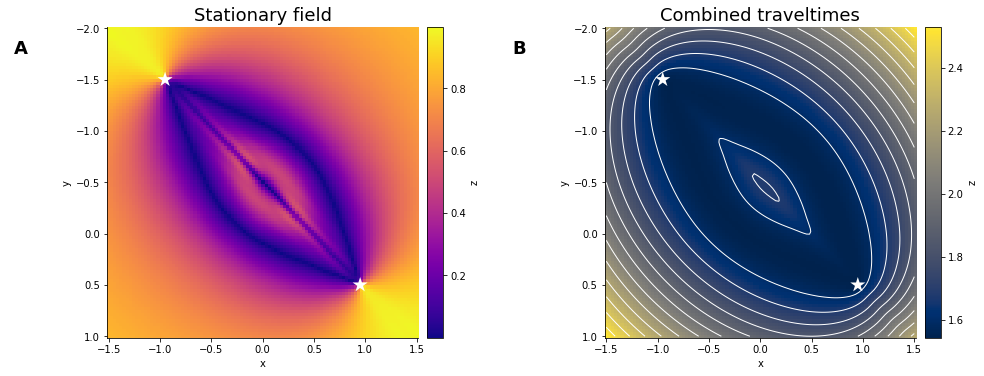

In [22]:
smap = hv.Image((x, z, Sc.T)).opts(cmap='plasma', colorbar=True,
                                   invert_yaxis=True, 
                                   fontsize=dict(title=18))
tcmap = hv.Image((x, z, Tc.T)).opts(cmap='cividis', colorbar=True,
                                    invert_yaxis=True)
tcctr = hv.operation.contours(tcmap, levels=12).opts(color='white', cmap=['white'], 
                                                     linestyle='solid', linewidth=1,
                                                     show_legend=False, fontsize=dict(title=18))
scp = hv.Scatter(np.array([xs1, xs2])).opts(marker='*', s=250, c='white')
fig1 = smap * scp
fig2 = tcmap * tcctr * scp
(fig1.opts(title='Stationary field') + 
 fig2.opts(title='Combined traveltimes')).opts(fig_size=160, shared_axes=False)

---
<a id='marmousi'></a>
# Example in Marmousi model
---

## Velocity model

In [ ]:
Vel = NES.misc.Marmousi(smooth=3, section=[[600, 881], None])
dx, dz = 0.0125 * 3, 0.0125 * 3
xmin, zmin = Vel.xmin
xmax, zmax = Vel.xmax
x = np.arange(xmin, xmax, dx)
z = np.arange(zmin, zmax, dz)
nx, nz = len(x), len(z)

Xr = np.stack(np.meshgrid(x, z, indexing='ij'), axis=-1)

V = Vel(Xr)

## Reference solution

In [ ]:
# Source points
s_sp = 5
Xs = np.stack(np.meshgrid(x[::s_sp], z[::s_sp], indexing='ij'), axis=-1)
X = np.stack(np.meshgrid(x[::s_sp], z[::s_sp], x, z, indexing='ij'), axis=-1)

In [ ]:
# Traveltime using Factored fast marching of second order

T_ref = np.empty(X.shape[:-1])
dxs = [x[1]-x[0], z[1]-z[0]]
for i, ixs in enumerate(tqdm(range(0, nx, s_sp))):
    for j, jzs in enumerate(range(0, nz, s_sp)):
        T_ref[i,j] = ffm(V, (ixs,jzs), dxs, 2)
        T_ref[i,j] *= distance(V.shape, dxs, (ixs,jzs), indexing='ij')

  0%|          | 0/19 [00:00<?, ?it/s]

## NES-TP initializaiton and training

In [ ]:
# Eikonal equation - optional
eikonal = NES.IsoEikonal(p=2, # power of right and left hand sides of equation 
                         hamiltonian=True # whether to use Hamiltonian form
                         )

# Initialization
Eik = NES.NES_TP(velocity=Vel, # velocity model (see NES.Interpolator)
                 eikonal=eikonal # optional, by default isotropic eikonal equation
                 )

# Build neural-network model
tf.keras.backend.clear_session()
Eik.build_model(nl=5, # number of layers
                nu=100, # number of units (may be a list)
                act='ad-gauss-1', # acivation funciton ('ad' means adaptive, '1' means slope scale)
                out_act='ad-sigmoid-1', # output activation, 'sigmoid' stands for improved factorization
                input_scale=True, # inputs scaling
                factored=True, # factorization
                out_vscale=True, # constraining by the slowest and the fastest solutions
                reciprocity=True, # symmetrizaion for the reciprocity principle 
                )

# Compilation for training - optional
Eik.compile(optimizer=None, # optimizer can be set manually
            loss='mae', # loss function
            lr=0.005, # learning rate for Adam optimizer
            decay=0.0005) # decay rate for Adam optimizer

In [ ]:
%%time
num_pts = 100000
h = Eik.train(x_train=num_pts, # number of random colocation points for training
              tolerance=8e-3, # tolerance value for early stopping (expected error with 2nd-order f-FMM)
              epochs=3000,
              verbose=0,
              callbacks=[TqdmCallback(verbose=0, miniters=10, mininterval=5)], # progress bar
              batch_size=int(num_pts/4),
              )

0epoch [00:00, ?epoch/s]

Epoch 02412: early stopping
loss: 0.01146
Approximate RMAE of solution: 0.79280 %
Wall time: 4min 54s


## Save and load

In [ ]:
filepath = 'NES-TP_Model_Marmousi'
Eik.save(filepath, # path and filename which defines the folder with saved model
         save_optimizer=False, # optimizer state can be saved to continue training
         training_data=False) # training data can be saved
Eik = NES.NES_TP.load(filepath)

Loaded model from "NES-TP_Model_Marmousi"


## Traveltime and gradient fields

In [ ]:
T = Eik.Traveltime(X)
G = Eik.GradientR(X)

# MAE of traveltimes
print('MAE', abs(T - T_ref).mean())
print('RMAE', abs(T - T_ref).mean() / T_ref.mean() * 100, '%')

MAE 0.005042527216416646
RMAE 0.7001351460050397 %


In [ ]:
figs = []

for ixs in [(2,1), (12,18)]:
    vmap = hv.Image((x, z, V.T), kdims=['X (km)', 'Z (km)'], 
                  vdims='Velocity, km/s', 
                  label='V').opts(cmap='viridis', colorbar=True)

    colors = ['black', 'white']
    tmapref = hv.Image((x, z, T_ref[ixs].T), label='T_ref')
    tmap = hv.Image((x, z, T[ixs].T), label='T_NES')

    levels = np.linspace(T.min(), T.max(), 15)

    tctrref = hv.operation.contours(tmapref, levels=levels).opts(color=colors[0], cmap=[colors[0]], 
                                                                 linestyle='solid', linewidth=4)
    tctr = hv.operation.contours(tmap, levels=levels).opts(color=colors[1],  cmap=[colors[1]], 
                                                           linestyle='dashed', linewidth=2)

    srcp = hv.Scatter([Xs[ixs]]).opts(marker='*', s=200, c='r')

    sp = 7
    G_ = G[ixs][::sp, ::sp]
    mag = np.linalg.norm(G_, axis=-1)
    angle = -np.arctan2(G_[..., 1]/mag, G_[..., 0]/mag)
    vf = hv.VectorField((x[::sp], z[::sp], angle.T, mag.T)).opts(magnitude='Magnitude')

    fig1 = (vmap * tctrref * tctr * srcp).opts(hv.opts.Image(show_legend=False, fig_size=170, 
                                                invert_yaxis=True,
                                      fontsize=dict(labels=15, ticks=15, legend=15, title=18)))
    fig2 = (vmap * srcp * vf).opts(hv.opts.Image(show_legend=False, fig_size=170, 
                                                invert_yaxis=True,
                                      fontsize=dict(labels=15, ticks=15, legend=15, title=18)))
    figs.append((fig1.opts(title='Solution contours') + fig2.opts(title='Gradient field')).opts(fig_size=200))

fig = hv.Layout(figs).cols(2)

:Layout
   .Overlay.I   :Overlay
      .Image.V        :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Contours.T_ref :Contours   [x,y]   (z)
      .Contours.T_NES :Contours   [x,y]   (z)
      .Scatter.I      :Scatter   [x]   (y)
   .Overlay.II  :Overlay
      .Image.V       :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Scatter.I     :Scatter   [x]   (y)
      .VectorField.I :VectorField   [x,y]   (Angle,Magnitude)
   .Overlay.III :Overlay
      .Image.V        :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Contours.T_ref :Contours   [x,y]   (z)
      .Contours.T_NES :Contours   [x,y]   (z)
      .Scatter.I      :Scatter   [x]   (y)
   .Overlay.IV  :Overlay
      .Image.V       :Image   [X (km),Z (km)]   (Velocity, km/s)
      .Scatter.I     :Scatter   [x]   (y)
      .VectorField.I :VectorField   [x,y]   (Angle,Magnitude)
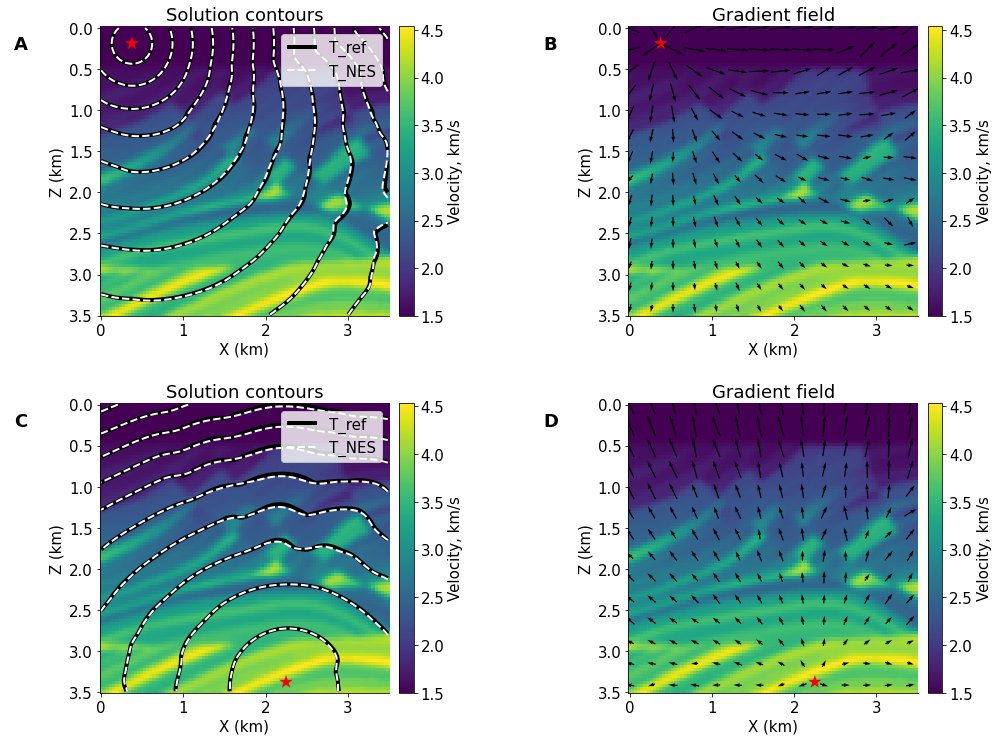

In [ ]:
fig.opts(fig_size=170)

## Stationary points

In [ ]:
%%time
xs1 = [1.8, 3.4]; xs2 = [2.69, 1]
Sc, Tc = Eik.Raylets(xs1=xs1, # source #1 (source)
                     xs2=xs2, # source #2 (receiver)
                     Xc=Xr, # grid for stationary field
                     traveltimes=True, # whether to calculate combined traveltimes
                     verbose=0)

Wall time: 855 ms


:Layout
   .Overlay.I  :Overlay
      .Image.I   :Image   [x,y]   (z)
      .Scatter.I :Scatter   [x]   (y)
   .Overlay.II :Overlay
      .Image.I    :Image   [x,y]   (z)
      .Contours.I :Contours   [x,y]   (z)
      .Scatter.I  :Scatter   [x]   (y)
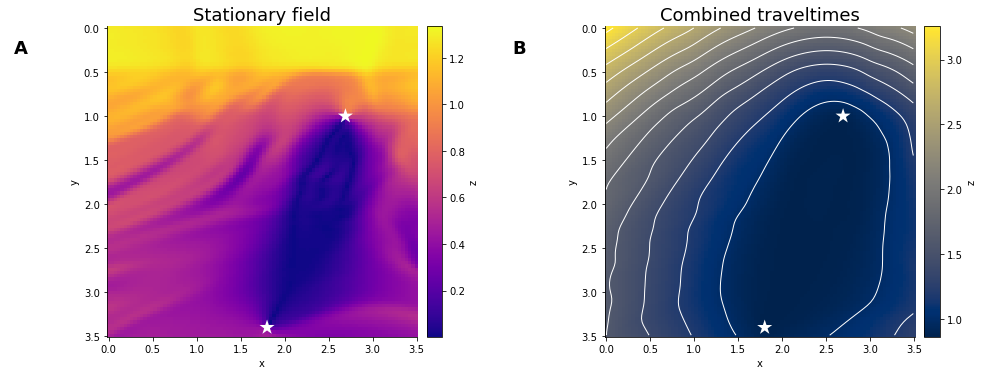

In [ ]:
smap = hv.Image((x, z, Sc.T)).opts(cmap='plasma', colorbar=True,
                                   invert_yaxis=True, 
                                   fontsize=dict(title=18))
tcmap = hv.Image((x, z, Tc.T)).opts(cmap='cividis', colorbar=True,
                                    invert_yaxis=True)
tcctr = hv.operation.contours(tcmap, levels=12).opts(color='white',  cmap=['white'], 
                                                     linestyle='solid', linewidth=1,
                                                     show_legend=False, fontsize=dict(title=18))
scp = hv.Scatter(np.array([xs1, xs2])).opts(marker='*', s=250, c='white')
fig1 = smap * scp
fig2 = tcmap * tcctr * scp
(fig1.opts(title='Stationary field') + 
 fig2.opts(title='Combined traveltimes')).opts(fig_size=160, shared_axes=False)

---
<a id='3dmodel'></a>
# Example in 3D Marmousi model
---

To solve in 3D, we just need to use 3D coordinates, no other modifications

## Velocity model

In [ ]:
Vel = NES.misc.Marmousi(smooth=6, section=[[600, 881], None])
dx, dz = 0.035, 0.035
dy = dx
xmin, zmin = Vel.xmin
xmax, zmax = Vel.xmax
ymin, ymax = xmin, xmax

x = np.arange(xmin, xmax, dx)
y = np.arange(ymin, ymax, dy)
z = np.arange(zmin, zmax, dz)
nx, ny, nz = len(x), len(y), len(z)

X2d = np.stack(np.meshgrid(x, z, indexing='ij'), axis=-1)
Xr = np.stack(np.meshgrid(x, y, z, indexing='ij'), axis=-1)

V2d = Vel(X2d)
V = np.tile(V2d.reshape(nx, 1, nz), (1, ny, 1))

Vel = NES.Interpolator(V, x, y, z)

## Reference solution

In [ ]:
# Source points
s_sp = 35
Xs = np.stack(np.meshgrid(x[::s_sp], y[::s_sp], z[::s_sp], indexing='ij'), axis=-1)
X = NES.utils.RegularGrid.sou_rec_pairs(Xs, Xr)

In [ ]:
# Traveltime using Factored fast marching of second order

T_ref = np.empty(X.shape[:-1])
dxs = [dx, dy, dz]
with tqdm(total=Xs[...,0].size) as p_bar:
    for i, ixs in enumerate(range(0, nx, s_sp)):
        for j, jys in enumerate(range(0, ny, s_sp)):
            for k, kzs in enumerate(range(0, nz, s_sp)):
                T_ref[i,j,k] = ffm(V, (ixs,jys,kzs), dxs, 2)
                T_ref[i,j,k] *= distance(V.shape, dxs, (ixs,jys,kzs), indexing='ij')
                p_bar.update()

  0%|          | 0/27 [00:00<?, ?it/s]

## NES-TP initializaiton and training

In [ ]:
# Initialization
Eik = NES.NES_TP(velocity=Vel)

# Build neural-network model
tf.keras.backend.clear_session()
Eik.build_model(nl=5, nu=100)

# Compilation for training - optional
Eik.compile(loss='mae', lr=0.005, decay=0.0005)

In [ ]:
%%time
num_pts = 240000
h = Eik.train(x_train=num_pts, epochs=1500, verbose=0,
              callbacks=[TqdmCallback(verbose=0, miniters=10, mininterval=5)], # progress bar
              batch_size=int(num_pts/4),
              )

0epoch [00:00, ?epoch/s]

CPU times: total: 8min 39s
Wall time: 7min 19s


## Save and load

In [ ]:
filepath = 'NES-TP_Model_3DMarmousi'

In [ ]:
Eik.save(filepath, # path and filename which defines the folder with saved model
         save_optimizer=False, # optimizer state can be saved to continue training
         training_data=False) # training data can be saved

In [ ]:
Eik = NES.NES_TP.load(filepath)

Loaded model from "NES-TP_Model_3DMarmousi"


## Traveltime

In [ ]:
%time T = Eik.Traveltime(X, verbose=1)

# MAE of traveltimes
print('MAE', abs(T - T_ref).mean())
print('RMAE', abs(T - T_ref).mean() / T_ref.mean() * 100, '%')

279/279 [==============================] - 4s 15ms/step
CPU times: total: 7.03 s
Wall time: 5.48 s
MAE 0.005586570822485764
RMAE 0.541936265742233 %


### Slice view

In [ ]:
figs = []
colors = ['black', 'white']
k_dim1 = [hv.Dimension("X", unit='km'), hv.Dimension("Z", unit='km')]
k_dim2 = [hv.Dimension("Y", unit='km'), hv.Dimension("Z", unit='km')]
k = ["Y", "X"]

SID = (1, 2, 2) # source index to plot

D = [(V[:,SID[1]*s_sp,:], T[SID][:,SID[1]*s_sp,:], T_ref[SID][:,SID[1]*s_sp,:], k_dim1), 
     (V[SID[0]*s_sp,:,:], T[SID][SID[0]*s_sp,:,:], T_ref[SID][SID[0]*s_sp,:,:], k_dim2),]

for i, (Vi, Ti, T_refi, kd) in enumerate(D):
    vmap = hv.Image((x, z, Vi.T), kdims=kd, vdims='Velocity, km/s', 
                    label='V').opts(cmap='viridis')


    tmapref = hv.Image((x, z, T_refi.T), label='T_ref')
    tmap = hv.Image((x, z, Ti.T), label='T_NES')

    levels = np.linspace(Ti.min(), Ti.max(), 12)

    tctrref = hv.operation.contours(tmapref, levels=levels).opts(color=colors[0], cmap=[colors[0]], 
                                                                 linestyle='solid', linewidth=4)
    tctr = hv.operation.contours(tmap, levels=levels).opts(color=colors[1], cmap=[colors[1]], 
                                                           linestyle='dashed', linewidth=2)

    srcp = hv.Scatter(([Xs[SID][i]], [Xs[SID][-1]])).opts(marker='*', s=200, c='r')

    fig = (vmap * tctrref * tctr * srcp).opts(hv.opts.Image(show_legend=False, fig_size=170, 
                                                invert_yaxis=True,
                                      fontsize=dict(labels=15, ticks=15, legend=15, title=18)))
    figs.append(fig.opts(fig_size=200, title=f'{k[i]} = {Xs[SID][(i == 0) * 1]:.2f} km', 
                         show_legend=(i==0)))

fig = hv.Layout(figs).cols(2).opts(sublabel_format='', fig_size=150)

:Layout
   .Overlay.I  :Overlay
      .Image.V        :Image   [X,Z]   (Velocity, km/s)
      .Contours.T_ref :Contours   [x,y]   (z)
      .Contours.T_NES :Contours   [x,y]   (z)
      .Scatter.I      :Scatter   [x]   (y)
   .Overlay.II :Overlay
      .Image.V        :Image   [Y,Z]   (Velocity, km/s)
      .Contours.T_ref :Contours   [x,y]   (z)
      .Contours.T_NES :Contours   [x,y]   (z)
      .Scatter.I      :Scatter   [x]   (y)
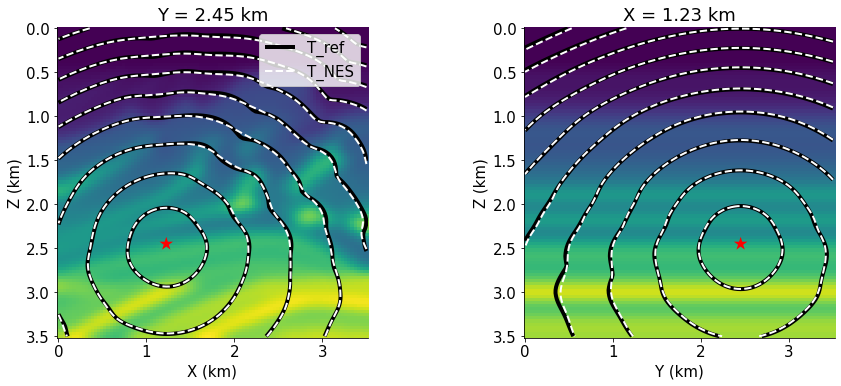

In [ ]:
fig

### 3d view

In [ ]:
# !pip install plotly # if needed

import plotly.graph_objects as go

In [ ]:
SID = (1, 1, 1)
sp = 2
Xr2, Yr2, Zr2 = np.transpose(Xr[::sp, ::sp, ::sp], (3, 0, 1, 2))
T2 = T[SID][::sp, ::sp, ::sp]
V2 = V[::sp, ::sp, ::sp]
T_ref2 = T_ref[SID][::sp, ::sp, ::sp]

In [ ]:
fig = go.Figure(data=go.Isosurface(
    x=Xr2.flatten(),
    y=Yr2.flatten(),
    z=Zr2.flatten(),
    name='NES-TP',
    colorbar=dict(title='NES-TP (s)'),
    colorscale='Cividis',
    isomin=0.3, isomax=1.0,
    value=T2.flatten(),
    showlegend=True,
    opacity=0.9,
    surface_count=3,
    caps=dict(x_show=False, y_show=False, z_show=False),
    ))
fig.add_trace(go.Isosurface(
    x=Xr2.flatten(),
    y=Yr2.flatten(),
    z=Zr2.flatten(),
    name='FMM',
    colorbar=dict(xanchor='right', x=1.25, title='FMM (s)',
                  yanchor='top', y=1.0),
    isomin=0.3, isomax=1.0,
    value=T_ref2.flatten(),
    surface_fill=0.75,
    showlegend=True,
    opacity=0.8,
    surface_count=3,
    caps=dict(x_show=False, y_show=False, z_show=False),
    ))
fig.add_trace(go.Volume(
    x=Xr2.flatten(),
    y=Yr2.flatten(),
    z=Zr2.flatten(),
    value=V2.flatten(),
    opacity=0.5,
    legendgroup='Model',
    name='Velocity model',
    showlegend=True,
    colorscale='Viridis',
    surface_count=1,
    slices_x=dict(show=True, locations=[0.0]),
    slices_y=dict(show=True, locations=[0.0]),
    surface=dict(fill=0.0),
    colorbar=dict(xanchor='right', x=1.025, 
                  title='Velocity (km/s)',
                  yanchor='top', y=1.0),
    caps= dict(x_show=False, y_show=False, z_show=False), # no caps
    ))

fig = fig.update_layout(scene=dict(zaxis=dict(autorange='reversed')), 
                  showlegend=True,
                  legend=dict(yanchor="top", y=0.99, 
                              xanchor="left", x=0.01))

In [ ]:
fig.write_html('3d_view.html') # can be saved as interactive dashboard to open in new browser tab
# fig.show() # or visualized here